# โหลด Dataset + เตรียมข้อมูล

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# โหลดชุดข้อมูล
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# รีเชพให้มีช่องสี (28x28x1)
# .reshape(-1,28,28,1) เปลี่ยนให้ CNN เข้าใจว่าเป็นภาพ grayscale
# .astype("float32")	ใช้ float เพื่อให้คำนวณแม่นและเร็ว
x_train = x_train.reshape(-1, 28, 28, 1).astype("float32") / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype("float32") / 255.0

# One-hot encoding
# label = 3 → เปลี่ยนเป็น [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


# สร้างโมเดล CNN

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),

    # 🔥 เพิ่ม Dropout หลัง Flatten
    Dropout(0.5),  # ปิด neuron แบบสุ่ม 50%

    Dense(128, activation='relu'),

    # 🔥 เพิ่ม Dropout อีกชั้นก่อน Output
    Dropout(0.3),  # ปิด 30%

    Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Compile + Train

In [15]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(
    x_train, y_train,
    epochs=5,
    batch_size=64,
    validation_split=0.1
)

model.summary()

Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.8252 - loss: 0.5389 - val_accuracy: 0.9840 - val_loss: 0.0546
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9699 - loss: 0.1002 - val_accuracy: 0.9867 - val_loss: 0.0470
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9771 - loss: 0.0755 - val_accuracy: 0.9913 - val_loss: 0.0339
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9815 - loss: 0.0615 - val_accuracy: 0.9913 - val_loss: 0.0301
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9849 - loss: 0.0494 - val_accuracy: 0.9908 - val_loss: 0.0349


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 675,104 (2.58 MB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 450,070 (1.72 MB)

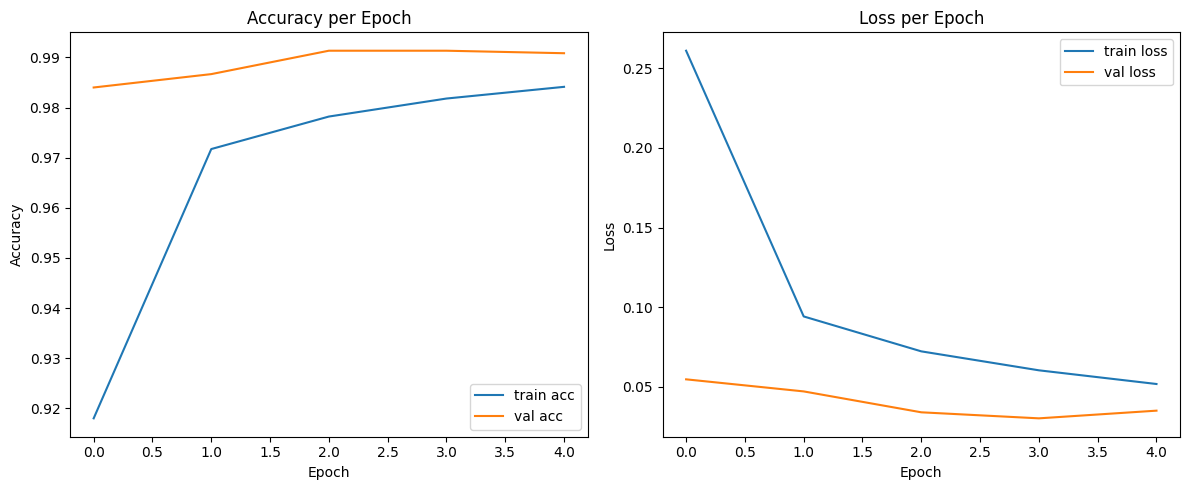

In [16]:
import matplotlib.pyplot as plt

# ตั้งขนาดภาพ
plt.figure(figsize=(12, 5))

# Accuracy Graph
plt.subplot(1, 2, 1)  # 1 แถว, 2 คอลัมน์, อันแรก
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.title("Accuracy per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

# Loss Graph
plt.subplot(1, 2, 2)  # 1 แถว, 2 คอลัมน์, อันที่สอง
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title("Loss per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

# แสดงภาพ
plt.tight_layout()
plt.show()


# ประเมินผล

In [17]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc:.4f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9889 - loss: 0.0305
Test accuracy: 0.9909


# เซฟโมเดล

In [27]:
model.save("handwritting_model.keras")

## โหลดโมเดล

In [33]:
from tensorflow.keras.models import load_model

model = load_model("handwritting_model.keras", compile=False)

In [34]:
from google.colab import files
files.download("handwritting_model.keras")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# ทดสอบโมเดลกับภาพใหม่

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


<ipython-input-22-03fe419a8e3c>:25: UserWarning: Glyph 3607 (\N{THAI CHARACTER THO THAHAN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-22-03fe419a8e3c>:25: UserWarning: Glyph 3634 (\N{THAI CHARACTER SARA AA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-22-03fe419a8e3c>:25: UserWarning: Glyph 3618 (\N{THAI CHARACTER YO YAK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-22-03fe419a8e3c>:25: UserWarning: Glyph 3592 (\N{THAI CHARACTER CHO CHAN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-22-03fe419a8e3c>:25: UserWarning: Glyph 3619 (\N{THAI CHARACTER RO RUA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-22-03fe419a8e3c>:25: UserWarning: Glyph 3636 (\N{THAI CHARACTER SARA I}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-22-03fe419a8e3c>:25: UserWarning: Glyph 3591 (\N{THAI CHARACTER NGO NGU}) missing from font(s) DejaVu Sans.
  plt.tight_

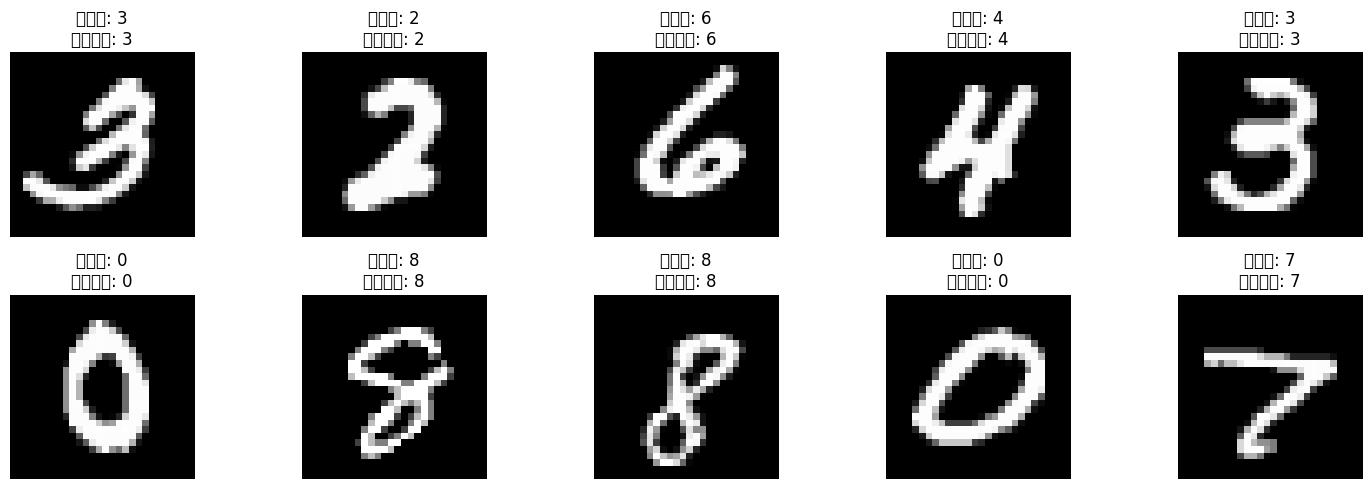

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# จำนวนภาพที่สุ่มมาโชว์
num_images = 10

# สุ่ม index แบบไม่ซ้ำ
random_indices = np.random.choice(len(x_test), num_images, replace=False)

# ตั้งขนาดภาพรวม
plt.figure(figsize=(15, 5))

for i, idx in enumerate(random_indices):
    img = x_test[idx]
    true_label = np.argmax(y_test[idx])
    prediction = model.predict(np.expand_dims(img, axis=0))
    predicted_label = np.argmax(prediction)

    # วาดภาพในกริด
    plt.subplot(2, 5, i + 1)
    plt.imshow(img.reshape(28, 28), cmap='gray')
    plt.title(f"ทาย: {predicted_label}\nจริง: {true_label}")
    plt.axis('off')

plt.tight_layout()
plt.show()

# classification_report and confusion_matrix

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       1.00      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.98      1.00      0.99       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



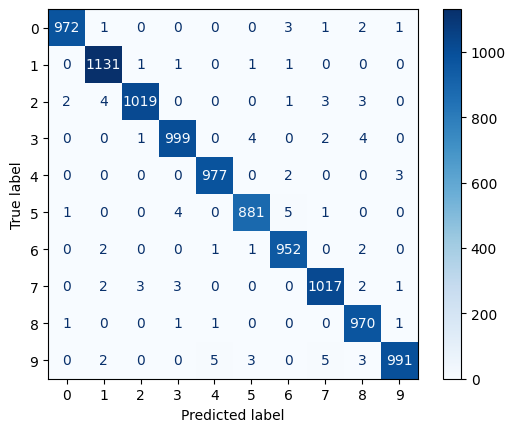

In [23]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# ทำนาย test set
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=range(10))
disp.plot(cmap='Blues')

# Classification Report
report = classification_report(y_true, y_pred_classes)
print(report)
